<a href="https://colab.research.google.com/github/sathwikyaragani/ml_adproject/blob/main/shipment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/Shipments_Data.csv'

In [4]:
import pandas as pd
shipment = pd.read_csv(file_path)
shipment


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,79015,D,Ship,5,2,251.150258,7,High,Male,39.284352,2721.316876,1
1,53528,C,Ship,3,3,263.566862,4,Low,Female,4.383131,5257.472937,1
2,23645,D,Road,5,1,268.170682,4,Low,Male,-0.166985,5604.990053,0
3,5867,C,Road,4,4,206.000000,2,high,M,8.000000,4093.000000,1
4,63510,C,Ship,5,2,286.831464,4,Low,Male,3.436376,4840.759196,1
...,...,...,...,...,...,...,...,...,...,...,...,...
100293,6266,F,Ship,4,4,217.000000,6,medium,M,9.000000,1974.000000,0
100294,54887,A,Road,4,5,256.923412,2,High,Male,4.247881,5077.045534,0
100295,76821,E,Air,2,2,164.910647,3,Medium,Female,8.843456,4133.926777,1
100296,861,A,Ship,5,3,144.000000,6,medium,F,35.000000,1009.000000,1


In [5]:
shipment.shape

(100298, 12)

In [6]:
shipment.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,79015,D,Ship,5,2,251.150258,7,High,Male,39.284352,2721.316876,1
1,53528,C,Ship,3,3,263.566862,4,Low,Female,4.383131,5257.472937,1
2,23645,D,Road,5,1,268.170682,4,Low,Male,-0.166985,5604.990053,0
3,5867,C,Road,4,4,206.000000,2,high,M,8.000000,4093.000000,1
4,63510,C,Ship,5,2,286.831464,4,Low,Male,3.436376,4840.759196,1


In [7]:
shipment.isna().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


In [8]:
shipment.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
100293,6266,F,Ship,4,4,217.000000,6,medium,M,9.000000,1974.000000,0
100294,54887,A,Road,4,5,256.923412,2,High,Male,4.247881,5077.045534,0
100295,76821,E,Air,2,2,164.910647,3,Medium,Female,8.843456,4133.926777,1
100296,861,A,Ship,5,3,144.000000,6,medium,F,35.000000,1009.000000,1
100297,15796,A,Road,5,5,181.740556,4,Low,Female,2.815542,4227.051334,1


In [9]:

shipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100298 entries, 0 to 100297
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100298 non-null  int64  
 1   Warehouse_block      100298 non-null  object 
 2   Mode_of_Shipment     100298 non-null  object 
 3   Customer_care_calls  100298 non-null  int64  
 4   Customer_rating      100298 non-null  int64  
 5   Cost_of_the_Product  100298 non-null  float64
 6   Prior_purchases      100298 non-null  int64  
 7   Product_importance   100298 non-null  object 
 8   Gender               100298 non-null  object 
 9   Discount_offered     100298 non-null  float64
 10  Weight_in_gms        100298 non-null  float64
 11  Reached.on.Time_Y.N  100298 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.2+ MB


In [10]:
import statsmodels.formula.api as smf
model = smf.ols('Customer_rating ~ Customer_care_calls + Prior_purchases', data=shipment).fit()
print(model.params)

Intercept              2.935697
Customer_care_calls    0.005672
Prior_purchases        0.009164
dtype: float64


In [11]:


print(model.pvalues,model.tvalues)

Intercept              0.000000
Customer_care_calls    0.082712
Prior_purchases        0.000499
dtype: float64 Intercept              185.534069
Customer_care_calls      1.735183
Prior_purchases          3.481141
dtype: float64


In [12]:
(model.rsquared,model.rsquared_adj)

(np.float64(0.00016984458053814766), np.float64(0.00014990679390036732))

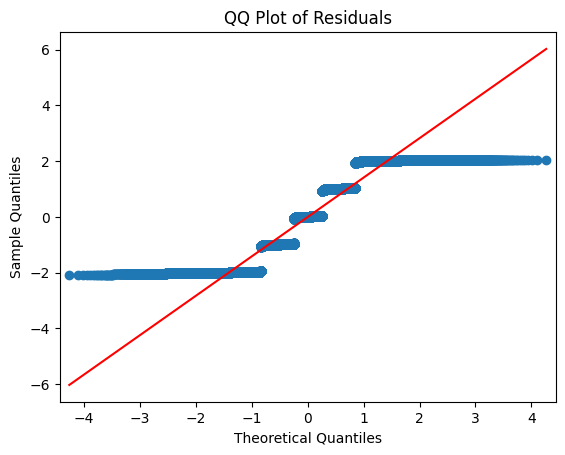

In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot = sm.qqplot(model.resid, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

In [14]:
import numpy as np
list(np.where(model.resid>10))

[array([], dtype=int64)]

Text(0.5, 1.0, 'Residual plot')

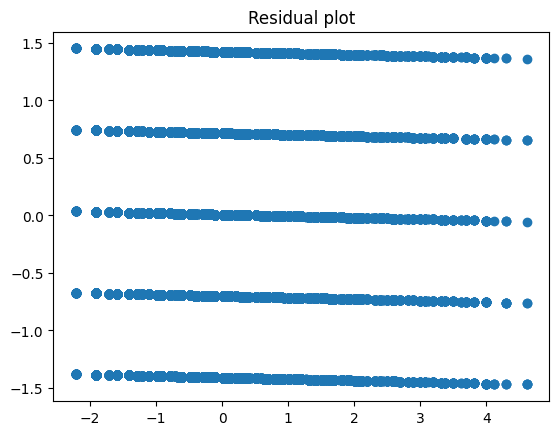

In [15]:

list(np.where(model.resid>10))
def get_standardized_values( vals ):
    return (vals - vals.mean())/ vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title("Residual plot")

In [16]:

import pandas as pd
file_path = "/content/Shipments_Data.csv"
df = pd.read_csv(file_path)

In [17]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100298 entries, 0 to 100297
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100298 non-null  int64  
 1   Warehouse_block      100298 non-null  object 
 2   Mode_of_Shipment     100298 non-null  object 
 3   Customer_care_calls  100298 non-null  int64  
 4   Customer_rating      100298 non-null  int64  
 5   Cost_of_the_Product  100298 non-null  float64
 6   Prior_purchases      100298 non-null  int64  
 7   Product_importance   100298 non-null  object 
 8   Gender               100298 non-null  object 
 9   Discount_offered     100298 non-null  float64
 10  Weight_in_gms        100298 non-null  float64
 11  Reached.on.Time_Y.N  100298 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.2+ MB


(None,
       ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
 0  79015               D             Ship                    5   
 1  53528               C             Ship                    3   
 2  23645               D             Road                    5   
 3   5867               C             Road                    4   
 4  63510               C             Ship                    5   
 
    Customer_rating  Cost_of_the_Product  Prior_purchases Product_importance  \
 0                2           251.150258                7               High   
 1                3           263.566862                4                Low   
 2                1           268.170682                4                Low   
 3                4           206.000000                2               high   
 4                2           286.831464                4                Low   
 
    Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
 0    Male         39.284352    2721.316

In [18]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
df = pd.read_csv("/content/Shipments_Data.csv")

In [20]:
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [21]:
scaler = MinMaxScaler()
scaled_cols = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [22]:
df['Discount_Cost_Impact'] = df['Discount_offered'] * df['Cost_of_the_Product']


In [23]:

X = df.drop(columns=['Reached.on.Time_Y.N', 'ID'])
y = df['Reached.on.Time_Y.N']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:

X_train = X_train[y_train.notna()]
y_train = y_train[y_train.notna()]

In [26]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [27]:

y_pred = clf.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5187437686939183
              precision    recall  f1-score   support

           0       0.54      0.12      0.20      9815
           1       0.52      0.90      0.66     10245

    accuracy                           0.52     20060
   macro avg       0.53      0.51      0.43     20060
weighted avg       0.53      0.52      0.43     20060



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
from google.colab import files
uploaded = files.upload()

Saving Shipments_Data.csv to Shipments_Data (1).csv


In [31]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

In [32]:
display(df.head())
display(df.info())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,79015,D,Ship,5,2,251.150258,7,High,Male,39.284352,2721.316876,1
1,53528,C,Ship,3,3,263.566862,4,Low,Female,4.383131,5257.472937,1
2,23645,D,Road,5,1,268.170682,4,Low,Male,-0.166985,5604.990053,0
3,5867,C,Road,4,4,206.000000,2,high,M,8.000000,4093.000000,1
4,63510,C,Ship,5,2,286.831464,4,Low,Male,3.436376,4840.759196,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100298 entries, 0 to 100297
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100298 non-null  int64  
 1   Warehouse_block      100298 non-null  object 
 2   Mode_of_Shipment     100298 non-null  object 
 3   Customer_care_calls  100298 non-null  int64  
 4   Customer_rating      100298 non-null  int64  
 5   Cost_of_the_Product  100298 non-null  float64
 6   Prior_purchases      100298 non-null  int64  
 7   Product_importance   100298 non-null  object 
 8   Gender               100298 non-null  object 
 9   Discount_offered     100298 non-null  float64
 10  Weight_in_gms        100298 non-null  float64
 11  Reached.on.Time_Y.N  100298 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.2+ MB


None

In [33]:
df.drop(columns=['ID'], inplace=True)

In [34]:
label_encoders = {}
for col in ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [35]:
X = df.drop(columns=['Reached.on.Time_Y.N'])
y = df['Reached.on.Time_Y.N']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [37]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = log_reg.predict(X_test)

In [40]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [41]:
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.5151
Confusion Matrix:
 [[4442 5355]
 [4372 5891]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.45      0.48      9797
           1       0.52      0.57      0.55     10263

    accuracy                           0.52     20060
   macro avg       0.51      0.51      0.51     20060
weighted avg       0.51      0.52      0.51     20060



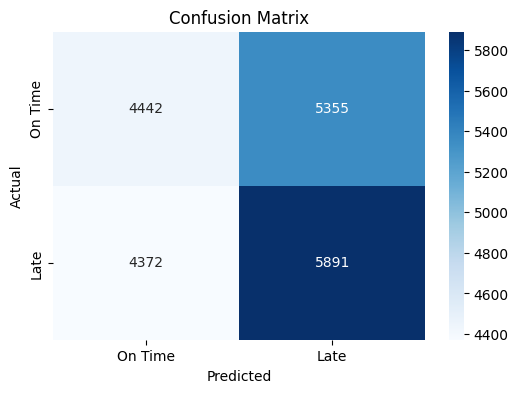

In [42]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Late'], yticklabels=['On Time', 'Late'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()